# Perceptron Loss Function

The Perceptron loss function is used in machine learning for binary classification tasks. It is defined as:

$$ L(y, \hat{y}) = \max(0, -y \cdot \hat{y}) $$

where:
- \( y \) is the true label (either -1 or 1)
- \( \hat{y} \) is the predicted label

The Perceptron loss function penalizes misclassified examples. If the example is correctly classified, the loss is zero. If it is misclassified, the loss is proportional to the distance from the decision boundary.

## Partial Derivatives

To update the weights in the Perceptron algorithm, we need to compute the gradient of the loss function with respect to the weights. The weight update rule is given by:

$$ w_{new} = w_{old} + \eta \cdot y \cdot x $$

where:
- \( \eta \) is the learning rate
- \( x \) is the input feature vector

The partial derivative of the Perceptron loss function with respect to the weights \( w \) is:

$$ \frac{\partial L}{\partial w} = 
\begin{cases} 
0 & \text{if } y \cdot \hat{y} > 0 \\
-y \cdot x & \text{if } y \cdot \hat{y} \leq 0 
\end{cases}
$$

This means that if the example is correctly classified, the gradient is zero, and no update is made to the weights. If the example is misclassified, the weights are updated in the direction of the input feature vector scaled by the true label and the learning rate.

## Gradient Descent for Perceptron

The weight update rule using gradient descent for the Perceptron loss function is:

1. Compute the gradient:

$$ \frac{\partial L}{\partial w} = 
\begin{cases} 
0 & \text{if } y \cdot \hat{y} > 0 \\
-y \cdot x & \text{if } y \cdot \hat{y} \leq 0 
\end{cases}
$$

2. Update the weights:

$$ w_{new} = w_{old} - \eta \cdot \frac{\partial L}{\partial w} $$

Simplified:

$$ w_{new} = 
\begin{cases} 
w_{old} & \text{if } y \cdot \hat{y} > 0 \\
w_{old} + \eta \cdot y \cdot x & \text{if } y \cdot \hat{y} \leq 0 
\end{cases}
$$

Correctly classified examples leave weights unchanged; misclassified examples update weights in the direction of \( y \cdot x \) scaled by the learning rate \( \eta \).

In [ ]:
import pandas as pd # data manipulation
import seaborn as sns # data visualization
import numpy as np 
import matplotlib.pyplot as plt

In [103]:
data=pd.read_csv('placement.csv')
# data['placed'] = data['placed'].replace(0, -1)
data.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [104]:
data.shape


(100, 3)

In [105]:
y = data['placed']
x = data[['resume_score', 'cgpa']]
x[:5]


,resume_score,cgpa
0,6.52,8.14
1,5.17,6.17
2,8.86,8.27
3,7.27,6.88
4,7.30,7.52


In [106]:
len(x.values)

100

<Axes: xlabel='cgpa', ylabel='resume_score'>

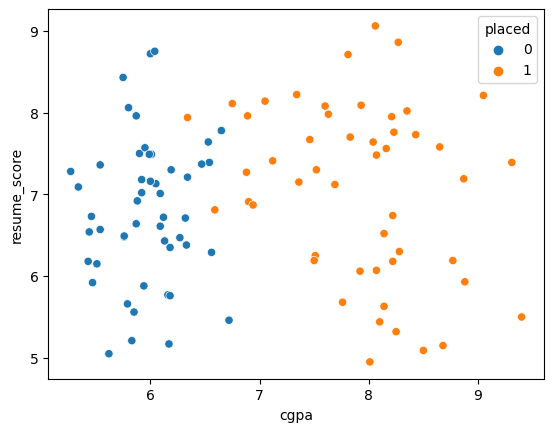

In [107]:
sns.scatterplot(x='cgpa',y='resume_score',data=data,hue='placed')

In [108]:
def perceptron(x,y):
    w1=w2=b=1
    lr=.1
    epochs=1000
    for j in range(epochs):
        for i in range(len(x)):
            z=w1*x[i][0]+w2*x[i][1]+b
            if z*y[i]<0 :
                w1=w1+lr*x[i][0]*y[i]
                w2=w2+lr*x[i][1]*y[i]
                b=b+lr*y[i]
            elif (y[i]==0 and z>0):
                w1=w1+lr*x[i][0]*-1
                w2=w2+lr*x[i][1]*-1
                b=b+lr*-1

    return w1,w2,b

In [109]:
w1,w2,b=perceptron(x.values,y.values)
w1,w2,b


(0.22899999999992626, 10.072000000001195, -71.10000000000024)

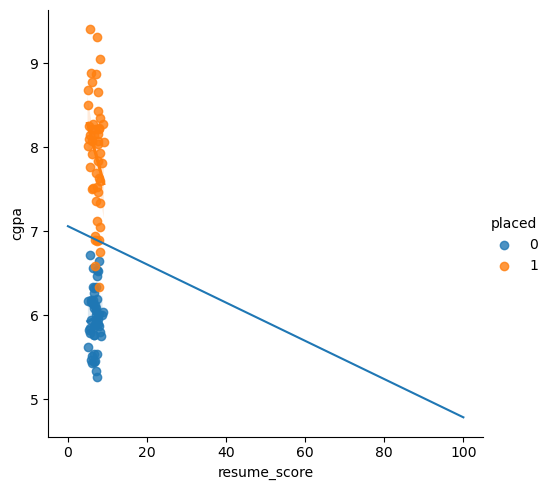

In [110]:
# the line along with the data points
sns.lmplot(x='resume_score', y='cgpa', data=data,hue='placed')
plt.plot(np.linspace(0, 100, 100), -(w1 * np.linspace(0, 100, 100) + b) / w2)
plt.show()


In [111]:
def hinge_loss(x, y, w1, w2, b):
    loss = 0
    for i in range(len(x)):
        z = w1 * x[i][0] + w2 * x[i][1] + b
        loss += max(0, 1 - y[i] * z)
    return loss / len(x)

loss = hinge_loss(x.values, y.values, w1, w2, b)
loss



0.6651688999994896